In [1]:
import numpy as np
from sklearn.datasets import make_blobs

class ScratchKMeans:
  def _init(self, n_clusters, n_init, max_iter, tol, verbose=False):
    self.n_clusters=n_clusters
    self.n_init=n_init
    self.max_iter=max_iter
    self.tol=tol
    self.verbose=verbose




#[Problem 2] Creation of a function to obtain SSE

  def calc_sse(self, X):
      sse = 0
      for i in range(len(X)):
          for j in range(self.n_clusters):
              if j == X[i, -1]:
                  sse += np.sum((X[i, :-1] - self.myu[j]) ** 2)
      if self.best_sse > sse:
          self.best_sse = sse
          self.record_myu = self.myu
          self.record_cluster = self.n_clusters
#[Problem 3] Allocation to cluster
  def _update_cluster(self, X):
    for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.n_clusters):
            dist = np.sqrt(np.sum((X[i, :-1] - self.myu[j]) ** 2))
            if dist < dist_m:
                dist_m = dist
                X[i, -1] = j

#[Problem 4] Movement of the center point
  def _update_myu(self, X):
      for j in range(self.n_clusters):
          self.myu[j] = np.mean(X[X[:, -1] == j, :-1], axis=0)

#[Problem 5] Repeat

  def fit(self, X):
      for i in range(self.n_init):
          self.myu = X[np.random.choice(len(X), size=self.n_clusters, replace=False)]
          cluster = np.zeros(len(X))
          X_cluster = np.concatenate([X, cluster.reshape(-1, 1)], axis=1)
          for j in range(self.n_iter):
              self.calc_sse(X_cluster)
              self._update_cluster(X_cluster)
              self._update_myu(X_cluster)
              if self.verbose:
                  print(
                      "Initialize：%s　Number of times studied：%s　Best SSE：%s"
                      % (i, j, self.best_sse)
                  )
  #[Problem 6] Calculate with different initial values
  def __init__(self, n_clusters=2, n_init=20, n_iter=100, verbose=False):
    self.n_clusters = n_clusters
    self.n_init = n_init
    self.n_iter = n_iter
    self.verbose = verbose
    self.best_sse = 10**20
#[Problem 7] Estimate
  def predict(self, X):
    y_pred = np.zeros(len(X))
    for i in range(len(X)):
        dist_m = 10**20
        for j in range(self.record_cluster):
            dist = np.sqrt(np.sum((X[i] - self.record_myu[j]) ** 2))
            if dist < dist_m:
                dist_m = dist
                y_pred[i] = j
    return y_pred



In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

#[Problem 1] Determine the initial value of the center point

X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
  )

X_train, X_valid = train_test_split(X, train_size=0.8, random_state=None)
clf = ScratchKMeans(n_clusters=4, n_init=5, n_iter=100, verbose=True)
clf.fit(X_train)
pred = clf.predict(X_valid)



Initialize：0　Number of times studied：0　Best SSE：675.4178710215101
Initialize：0　Number of times studied：1　Best SSE：175.43425997472687
Initialize：0　Number of times studied：2　Best SSE：112.26543980181874
Initialize：0　Number of times studied：3　Best SSE：96.07415168869373
Initialize：0　Number of times studied：4　Best SSE：96.07415168869373
Initialize：0　Number of times studied：5　Best SSE：96.07415168869373
Initialize：0　Number of times studied：6　Best SSE：96.07415168869373
Initialize：0　Number of times studied：7　Best SSE：96.07415168869373
Initialize：0　Number of times studied：8　Best SSE：96.07415168869373
Initialize：0　Number of times studied：9　Best SSE：96.07415168869373
Initialize：0　Number of times studied：10　Best SSE：96.07415168869373
Initialize：0　Number of times studied：11　Best SSE：96.07415168869373
Initialize：0　Number of times studied：12　Best SSE：96.07415168869373
Initialize：0　Number of times studied：13　Best SSE：96.07415168869373
Initialize：0　Number of times studied：14　Best SSE：96.07415168869373
Ini

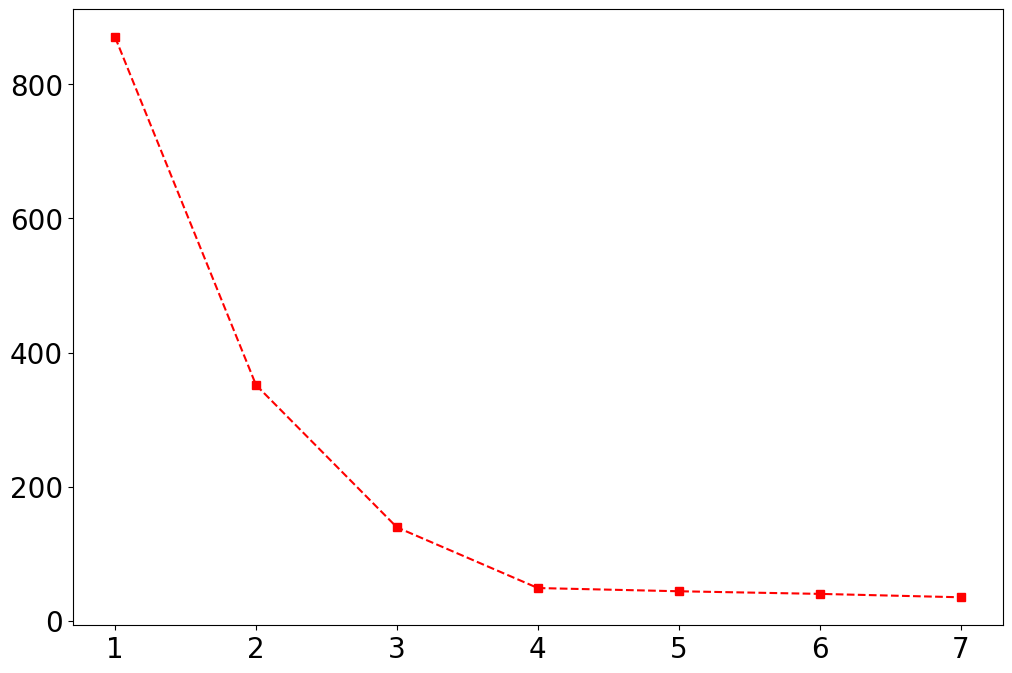

In [11]:
#[Problem 8] Implementation of elbow method
elbow = {}
for k in range(1, 8):
    model = ScratchKMeans(n_clusters=k, n_init=5, n_iter=100, verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12, 8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()), list(elbow.values()), "rs--")

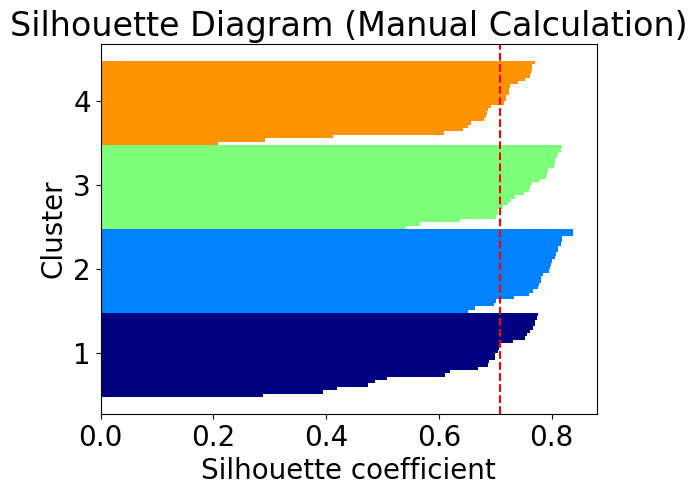

In [12]:
#[Problem 9] (Advance assignment) Silhouette diagram

import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from matplotlib import cm

def silhouette_manual(X, labels):
    n_samples = len(X)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    silhouette_vals = np.zeros(n_samples)

    distances = pairwise_distances(X)

    for i in range(n_samples):
        same_cluster = labels == labels[i]
        other_clusters = [c for c in unique_labels if c != labels[i]]

        if np.sum(same_cluster) > 1:
            a_i = np.mean(distances[i, same_cluster][distances[i, same_cluster] != 0])
        else:
            a_i = 0.0

        b_i = np.min([np.mean(distances[i, labels == c]) for c in other_clusters])

        silhouette_vals[i] = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) != 0 else 0.0

    silhouette_avg = np.mean(silhouette_vals)
    return silhouette_vals, silhouette_avg, labels, unique_labels, n_clusters

pred_labels = clf.predict(X)
silhouette_vals, silhouette_avg, y_km, cluster_labels, n_clusters = silhouette_manual(X, pred_labels.astype(int))

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(
        range(y_ax_lower, y_ax_upper),
        c_silhouette_vals,
        height=1.0,
        edgecolor="none",
        color=color,
    )
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel("Cluster")
plt.xlabel("Silhouette coefficient")
plt.title("Silhouette Diagram (Manual Calculation)")
plt.show()


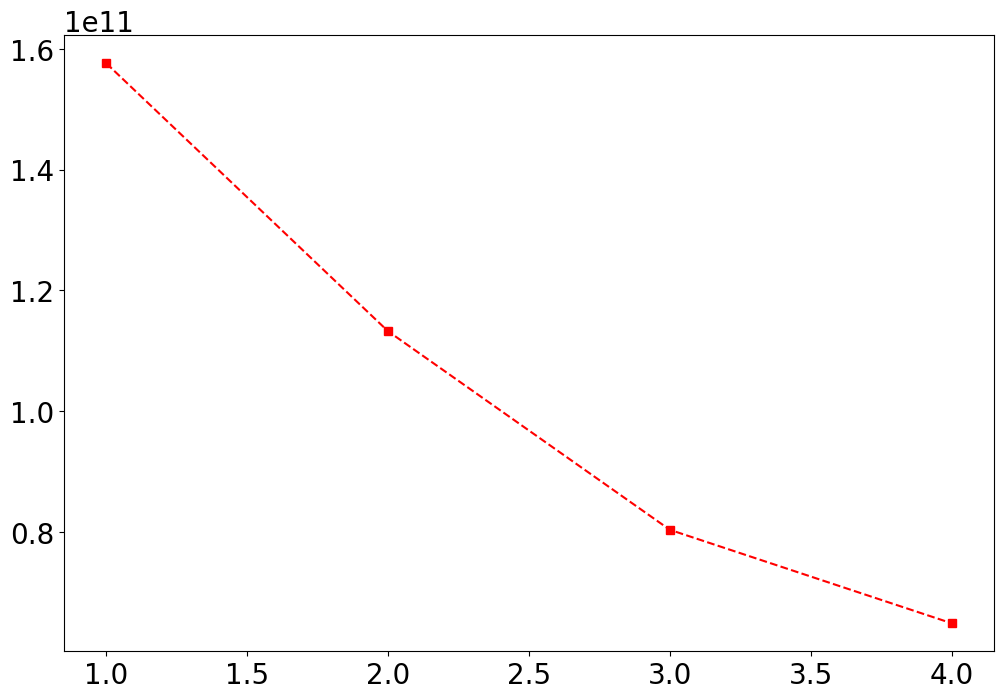

In [16]:
#[Problem 10] Selection of the number of clusters k


data = pd.read_csv("Wholesale customers data.csv")
X = data[
    ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
].values

elbow = {}
for k in range(1, 5):
    model = ScratchKMeans(n_clusters=k, n_init=5, n_iter=100, verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12, 8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()), list(elbow.values()), "rs--")


In [17]:
#[Problem 11] Comparison with known groups


c = ScratchKMeans(n_clusters=4, n_init=5, n_iter=100, verbose=False)
c.fit(X)
pred = c.predict(X)
summary_df = pd.DataFrame({"pred": pred, "Region": data["Region"],"Channel": data["Channel"] })

pd.pivot_table(
    summary_df, index="Region", columns="pred", values="Channel", aggfunc=len
)

pred,0.0,1.0,2.0,3.0
Region,,,,
1,16,10,2,49
2,12,4,1,30
3,67,44,8,197


In [20]:
#[Problem 12] Useful information for wholesalers

data["cluster"] = pred
data.groupby(['cluster']).count()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0.0,95,95,95,95,95,95,95,95
1.0,58,58,58,58,58,58,58,58
2.0,11,11,11,11,11,11,11,11
3.0,276,276,276,276,276,276,276,276


#[Problem 13] (Advance assignment) Investigation of other methods

##DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

*Advantages*:
* Finds clusters of arbitrary shape.
* No need to specify the number of clusters.
* Robust to noise and outliers.
* Scales well with large datasets.

*Disadvantages*:
* Sensitive to the choice of parameters (eps, min_samples).
* Struggles with clusters of varying density.
* Not ideal for high-dimensional data.
* Cluster boundaries can be unclear.


##t-SNE (t-Distributed Stochastic Neighbor Embedding)

*Advantages*:

* Effective for visualizing high-dimensional data in 2D/3D.
* Captures non-linear relationships.
* Preserves local structure well.
* Great for spotting clusters visually.

*Disadvantages*:

* Computationally expensive, especially for large datasets.
* Hard to interpret the resulting embeddings.
* Sensitive to hyperparameters.
* Not a clustering method (just for visualization).



##LLE (Locally Linear Embedding)

*Advantages*:
* Preserves local geometry in the data.
* Simple concept, good for non-linear data.
* Preserves both local and global structures.

*Disadvantages*:
* Computationally intensive.
* Sensitive to the choice of nearest neighbors.
* Struggles with outliers and disconnected data.
* Requires parameter tuning.


In [23]:
#[Problem 14] (Advance assignment) Use of t-SNE and DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
tse=TSNE(n_components=2,random_state=0)
X_tsne=tse.fit_transform(X)
clusing=DBSCAN(eps=2, min_samples=5).fit_predict(X_tsne)
clusing

array([ 0,  1,  1,  3,  4,  0,  0,  1,  2,  1,  1,  3,  4,  4,  4,  3,  1,
       -1,  4,  1,  4,  3,  3, -1,  4,  4,  3,  3,  1,  3,  4,  3,  3,  3,
        3,  1,  3,  5,  1,  3,  3,  4,  5,  1,  5,  1,  1,  1,  5,  1,  3,
        1,  3,  1,  3,  2,  1,  1,  3,  1,  1,  1,  1,  5,  3,  1,  1,  4,
       -1,  3,  6,  4,  3,  3,  1,  3,  3,  1,  3,  3,  3,  1,  5,  3,  0,
        1,  1,  3,  3,  3,  3,  3,  1,  3,  1,  3,  1,  3,  3,  3,  5,  1,
        1,  3,  3,  3,  1,  5,  1,  1,  3,  5,  6,  3,  3,  3,  3,  2,  3,
        3,  3,  3,  3,  0,  3,  3,  6,  4,  7,  3,  3,  3,  3,  3,  3,  3,
        1,  1,  0,  2,  4,  4,  3,  3,  3,  1,  3,  3,  3,  3,  3,  3,  3,
        7,  3,  1,  1,  3,  1,  1,  1,  3,  3,  1,  1,  5,  1,  3,  3,  3,
        1,  1,  1,  1,  3,  1,  3,  0,  0,  3,  0,  3,  1, -1,  3,  3,  3,
        1,  5,  1,  6,  3,  3,  1,  3,  6,  3,  1,  0,  3,  1,  1,  4,  3,
        3,  1,  3,  1,  1,  1,  3,  1,  3,  1,  1,  1,  1,  3,  1,  3,  3,
        1,  3,  3,  3,  0